In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, places
import xarray as xr

%matplotlib inline

#### Determine model grid points using lat/log

In [2]:
jjii = xr.open_dataset('/data/sallen/MEOPAR/grid/grid_from_lat_lon_mask999.nc')

In [3]:
#Find model grid location for Gulf Islands
lat, lon = 48.6, -123.5
method = 'nearest'
jj = jjii.jj.sel(lats=lat, lons=lon, method=method).item()
ii = jjii.ii.sel(lats=lat, lons=lon, method=method).item()
print (ii, jj)

201 344


In [4]:
#Find model grid location for Northern SoG
lat, lon = 49.75, -124.5
method = 'nearest'
jj = jjii.jj.sel(lats=lat, lons=lon, method=method).item()
ii = jjii.ii.sel(lats=lat, lons=lon, method=method).item()
print (ii, jj)

197 638


In [5]:
jjii.close()

#### Load a time series at one location by accessing netCDF4 files stored on /results or /results2

In [6]:
%%time
start= dt.datetime(2015,3,1)
end=dt.datetime(2015,8,1) # the code called below (evaltools.index_model_files) includes the end date 
                          # in the values returned
basedir='/results2/SalishSea/nowcast-green.201905/'
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'dia2_T' # load bio files
tres=24 # 1: hourly resolution; 24: daily resolution   <- try changing to 1 and loading hourly data
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
# flist contains paths: file pathes; t_0 timestemp of start of each file; t_n: timestamp of start of next file
print(flist)

ftype=dia2_T, are you sure? (if yes, add to list)
                                                 paths        t_0        t_n
0    /results2/SalishSea/nowcast-green.201905/01mar... 2015-03-01 2015-03-02
1    /results2/SalishSea/nowcast-green.201905/02mar... 2015-03-02 2015-03-03
2    /results2/SalishSea/nowcast-green.201905/03mar... 2015-03-03 2015-03-04
3    /results2/SalishSea/nowcast-green.201905/04mar... 2015-03-04 2015-03-05
4    /results2/SalishSea/nowcast-green.201905/05mar... 2015-03-05 2015-03-06
..                                                 ...        ...        ...
149  /results2/SalishSea/nowcast-green.201905/28jul... 2015-07-28 2015-07-29
150  /results2/SalishSea/nowcast-green.201905/29jul... 2015-07-29 2015-07-30
151  /results2/SalishSea/nowcast-green.201905/30jul... 2015-07-30 2015-07-31
152  /results2/SalishSea/nowcast-green.201905/31jul... 2015-07-31 2015-08-01
153  /results2/SalishSea/nowcast-green.201905/01aug... 2015-08-01 2015-08-02

[154 rows x 3 columns]
CP

In [7]:
# reminder of variable names in diat2_T files:
with nc.Dataset(flist.loc[0,['paths']].values[0]) as ff: #  <-when you access elements of a pandas array, sometimes
                                                         #    you get an array output, even if it only contains one
                                                         #    element. To get the element rather than the array 
                                                         #     containing it, use [0]
    print(ff.variables.keys())
    # also grab time reference:
    torig=dt.datetime.strptime(ff.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
    print('time origin:',torig)

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'HetMRub', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'MORTPHY', 'MORTMRUB', 'MORTDIAT', 'GRMESZDIAT', 'GRMESZMRUB', 'GRMESZPHY', 'GRMESZPON', 'GRMESZMICZ', 'GRMICZDIAT', 'GRMICZMRUB', 'GRMICZPHY', 'GRMICZPON', 'GRMICZMICZ'])
time origin: 1900-01-01 00:00:00


In [8]:
# get model i,j of location S3 from places
ij,ii=places.PLACES['S3']['NEMO grid ji']
ik=0 # choose surface level
#il=12 # hour

In [9]:
bio=xr.open_mfdataset(flist['paths'])

In [10]:
bio

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 154, x: 398, y: 898)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2015-03-01T12:00:00 ....
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon            (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_lat            (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    area                  (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    HetMRub               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    MORTPHY               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    MORTMRUB              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    MORTDIAT              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZDIAT            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZMRUB            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZPON             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZMICZ            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZDIAT            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZMRUB            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZPON             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZMICZ            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20150301_20150305
    description:  smelt diagnostics B
    title:        smelt diagnostics B
    Conventions:  CF-1.6
    timeStamp:    2019-Sep-24 05:51:21 GMT
    uuid:         f2026301-e3f6-4c36-aa49-6add108cff8c

In [11]:
%%time
tt=bio.time_centered
mesZdiat=bio.GRMESZDIAT.isel(deptht=ik,y=ij,x=ii) #isel lets you select by index;zero here could also =ik
mesZflag=bio.GRMESZPHY.isel(deptht=ik,y=ij,x=ii)
mesZmicro=bio.GRMESZMICZ.isel(deptht=ik,y=ij,x=ii)
#mesZrub=bio.GRMESZMRUB.isel(deptht=ik,y=ij,x=ii)


CPU times: user 5.75 ms, sys: 0 ns, total: 5.75 ms
Wall time: 5.72 ms


In [12]:
#mesZratio=mesZflag/mesZdiat

In [13]:
# This is not working. need to figure out how to depth average
# vertical sum of micro and meso zo in mmol/m3 * vertical grid thickness in m:
#intmicro=np.sum(ff.variables['microzooplankton'][il,:,:,:]*bio.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avmicro=intuz/np.sum(bio.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)

CPU times: user 36.1 s, sys: 4.81 s, total: 40.9 s
Wall time: 1min 4s


Text(0.5, 1.0, 'S3')

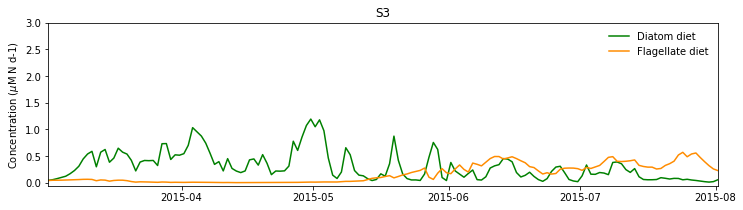

In [14]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,(mesZdiat*86400),'c-',color='green',label='Diatom diet')
ax.plot(tt,(mesZflag*86400),'-',color='darkorange',label='Flagellate diet')
#ax.plot(tt,mesZmicro,'-',color='lightblue',label='Microzoop diet')
ax.legend(loc=1,frameon=False);
ax.set_ylabel('Concentration ($\mu$M N d-1)')
ax.set_xlim(tt[0],tt[-1])
#ax.set_ylim(0,2)
ax.set_yticks(np.arange(0,2.5+1,0.5))
ax.set_title('S3')

#fig,ax=plt.subplots(1,1,figsize=(12,3))
#ax.plot(tt,(mesZratio),'c-',color='blue',label='Flagellates:Diatoms')
#ax.legend(loc=1);
#ax.set_ylabel('Concentration ($\mu$M N)')
#ax.set_xlim(tt[0],tt[-1])
#ax.set_title('S3')

In [15]:
bio.close()

### repeat for Baynes Sound

In [16]:
# get model i,j of location S3 from places
ij,ii=places.PLACES['Baynes Sound']['NEMO grid ji']
ik=0 # choose surface level



In [17]:
bio2=xr.open_mfdataset(flist['paths'])

In [18]:
bio2

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 154, x: 398, y: 898)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2015-03-01T12:00:00 ....
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon            (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_lat            (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    area                  (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    HetMRub               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    MORTPHY               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    MORTMRUB              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    MORTDIAT              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZDIAT            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZMRUB            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZPON             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZMICZ            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZDIAT            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZMRUB            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZPON             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZMICZ            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20150301_20150305
    description:  smelt diagnostics B
    title:        smelt diagnostics B
    Conventions:  CF-1.6
    timeStamp:    2019-Sep-24 05:51:21 GMT
    uuid:         f2026301-e3f6-4c36-aa49-6add108cff8c

In [19]:
%%time
tt=bio2.time_centered
mesZdiat=bio2.GRMESZDIAT.isel(deptht=ik,y=ij,x=ii) #isel lets you select by index;zero here could also =ik
mesZflag=bio2.GRMESZPHY.isel(deptht=ik,y=ij,x=ii)
mesZmicro=bio2.GRMESZMICZ.isel(deptht=ik,y=ij,x=ii)
#mesZrub=bio2.GRMESZMRUB.isel(deptht=ik,y=ij,x=ii)



CPU times: user 6.76 ms, sys: 306 µs, total: 7.06 ms
Wall time: 7.01 ms


CPU times: user 35.7 s, sys: 4.72 s, total: 40.5 s
Wall time: 1min 1s


Text(0.5, 1.0, 'Baynes Sound')

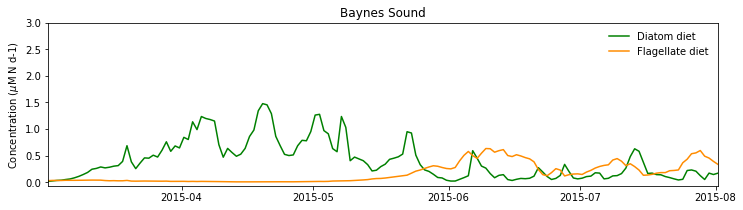

In [20]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,(mesZdiat*86400),'c-',color='green',label='Diatom diet')
ax.plot(tt,(mesZflag*86400),'-',color='darkorange',label='Flagellate diet')
#ax.plot(tt,mesZmicro,'-',color='lightblue',label='Microzoop diet')
ax.legend(loc=1,frameon=False);
ax.set_ylabel('Concentration ($\mu$M N d-1)')
ax.set_xlim(tt[0],tt[-1])
#ax.set_ylim(0,2)
ax.set_yticks(np.arange(0,2.5+1,0.5))
ax.set_title('Baynes Sound')

In [21]:
bio2.close()

In [22]:
# get model i,j of Gulf Islands
ij,ii=344,201
ik=0 # choose surface level



In [23]:
bio3=xr.open_mfdataset(flist['paths'])

In [24]:
bio3

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 154, x: 398, y: 898)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2015-03-01T12:00:00 ....
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon            (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_lat            (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    area                  (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    HetMRub               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    MORTPHY               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    MORTMRUB              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    MORTDIAT              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZDIAT            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZMRUB            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZPON             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZMICZ            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZDIAT            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZMRUB            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZPON             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZMICZ            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20150301_20150305
    description:  smelt diagnostics B
    title:        smelt diagnostics B
    Conventions:  CF-1.6
    timeStamp:    2019-Sep-24 05:51:21 GMT
    uuid:         f2026301-e3f6-4c36-aa49-6add108cff8c

In [25]:
%%time
tt=bio3.time_centered
mesZdiat=bio3.GRMESZDIAT.isel(deptht=ik,y=ij,x=ii) #isel lets you select by index;zero here could also =ik
mesZflag=bio3.GRMESZPHY.isel(deptht=ik,y=ij,x=ii)
mesZmicro=bio3.GRMESZMICZ.isel(deptht=ik,y=ij,x=ii)
#mesZrub=bio3.GRMESZMRUB.isel(deptht=ik,y=ij,x=ii)

CPU times: user 6.13 ms, sys: 239 µs, total: 6.37 ms
Wall time: 6.34 ms


In [26]:
#FlagDiatRatio=mesZflag/mesZdiat

CPU times: user 35.6 s, sys: 4.95 s, total: 40.6 s
Wall time: 1min 1s


Text(0.5, 1.0, 'Gulf Islands')

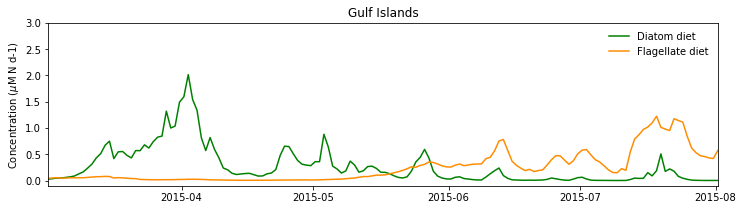

In [27]:
%%time
ffig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,(mesZdiat*86400),'c-',color='green',label='Diatom diet')
ax.plot(tt,(mesZflag*86400),'-',color='darkorange',label='Flagellate diet')
#ax.plot(tt,mesZmicro,'-',color='lightblue',label='Microzoop diet')
ax.legend(loc=1,frameon=False);
ax.set_ylabel('Concentration ($\mu$M N d-1)')
ax.set_xlim(tt[0],tt[-1])
#ax.set_ylim(0,2)
ax.set_yticks(np.arange(0,2.5+1,0.5))
ax.set_title('Gulf Islands')


In [28]:
bio3.close()

In [29]:
# get model i,j of Northern SoG
ij,ii=638,197
ik=0 # choose surface level



In [30]:
bio4=xr.open_mfdataset(flist['paths'])

In [31]:
bio4

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 154, x: 398, y: 898)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2015-03-01T12:00:00 ....
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon            (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_lat            (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    area                  (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    HetMRub               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    MORTPHY               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    MORTMRUB              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    MORTDIAT              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZDIAT            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZMRUB            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZPON             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMESZMICZ            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZDIAT            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZMRUB            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZPON             (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    GRMICZMICZ            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20150301_20150305
    description:  smelt diagnostics B
    title:        smelt diagnostics B
    Conventions:  CF-1.6
    timeStamp:    2019-Sep-24 05:51:21 GMT
    uuid:         f2026301-e3f6-4c36-aa49-6add108cff8c

In [32]:
%%time
tt=bio4.time_centered
mesZdiat=bio4.GRMESZDIAT.isel(deptht=ik,y=ij,x=ii) #isel lets you select by index;zero here could also =ik
mesZflag=bio4.GRMESZPHY.isel(deptht=ik,y=ij,x=ii)
mesZmicro=bio4.GRMESZMICZ.isel(deptht=ik,y=ij,x=ii)
#mesZrub=bio4.GRMESZMRUB.isel(deptht=ik,y=ij,x=ii)

CPU times: user 5.87 ms, sys: 0 ns, total: 5.87 ms
Wall time: 5.82 ms


CPU times: user 35.9 s, sys: 4.46 s, total: 40.4 s
Wall time: 53.2 s


Text(0.5, 1.0, 'Northern SoG')

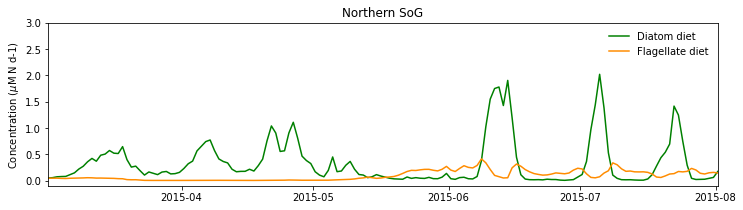

In [33]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,(mesZdiat*86400),'c-',color='green',label='Diatom diet')
ax.plot(tt,(mesZflag*86400),'-',color='darkorange',label='Flagellate diet')
#ax.plot(tt,mesZmicro,'-',color='lightblue',label='Microzoop diet')
ax.legend(loc=1,frameon=False);
ax.set_ylabel('Concentration ($\mu$M N d-1)')
ax.set_xlim(tt[0],tt[-1])
#ax.set_ylim(0,2)
ax.set_yticks(np.arange(0,2.5+1,0.5))
ax.set_title('Northern SoG')

In [34]:
bio4.close()